In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import pandas as pd
import timeit
import time
import tensorflow as tf
from joblib import dump, load
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
def sort(data):
    models = []
    model = np.unique(data[:,[0,1,2]], axis=0)
    
    for i in model:
        models.append(data[np.where((data[:,[0,1,2]] == i).all(axis=1))])

    return models 

def compare(models, data_num):
    results_all = []
    results_sep = []
    for model in models:
        result = np.zeros((len(model),6))
        model = np.delete(model, [2,4], 1)
    #     model_le = model[model[:,0]<=1]
    #     model_g = model[model[:,0]>1]
        # All dataset
    #     for i in range(1, 5):
    #         reg = load('results/d{}/models/all/poly_svm_{}.joblib'.format(data_num,i))
    #         result[:,i-1] = reg.predict(model[:,:-1])
        reg = load('results/d{}/models/all/rbf_svm.joblib'.format(data_num))
        result[:,4] = reg.predict(model[:,:-1])
        nn = tf.keras.models.load_model("results/d{}/models/all/nn.h5".format(data_num))
        result[:,5] = np.squeeze(nn.predict(model[:,:-1]), axis=-1)
        results_all.append(result)

        # a/c separated
        result = np.zeros((len(model),6))
        if model[0,0] <= 1:
            reg = load('results/d{}/models/le/rbf_svm.joblib'.format(data_num))
            result[:,4] = reg.predict(model[:,:-1])
            nn = tf.keras.models.load_model("results/d{}/models/le/nn.h5".format(data_num))
            result[:,5] = np.squeeze(nn.predict(model[:,:-1]), axis=-1)

        elif model[0,0] > 1:
            reg = load('results/d{}/models/g/rbf_svm.joblib'.format(data_num))
            result[:,4] = reg.predict(model[:,:-1])
            nn = tf.keras.models.load_model("results/d{}/models/g/nn.h5".format(data_num))
            result[:,5] = np.squeeze(nn.predict(model[:,:-1]), axis=-1)

        else:
            print("Something wrong!")

        results_sep.append(result)
        
    return results_all, results_sep

def plot(models, results_all, results_sep, model_num):
    plt.scatter(models[model_num][:,-3], models[model_num][:,-1], label="Ground Truth")
    plt.plot(models[model_num][:,-3], results_all[model_num][:,4], label="rbf svm all")
    plt.plot(models[model_num][:,-3], results_all[model_num][:,5], label="NN all")
    plt.plot(models[model_num][:,-3], results_sep[model_num][:,4], label="rbf svm separated")
    plt.plot(models[model_num][:,-3], results_sep[model_num][:,5], label="NN separated")
    plt.title("a/c={}; a/t={}; c/b={}".format(models[model_num][0,0],
                                             models[model_num][0,1],
                                             models[model_num][0,2]))
    plt.xlabel("phi")
    plt.ylabel("Mg")
    plt.legend()
    plt.show()
    return

# RN Dataset

In [3]:
data_num = "1"
# Loading test dataset
# df = pd.read_csv("data/d{}/test/{}.csv".format(data_num,data_num))
df = pd.read_csv("../data/3_datasets_new/1_RN_data.csv")
# df.drop(["c/b", "F"], axis=1, inplace=True)
d = df.to_numpy()

In [4]:
models = sort(d)
len(models)

32

2022-02-22 16:51:23.207761: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-02-22 16:51:23.207790: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (blade2070): /proc/driver/nvidia/version does not exist
2022-02-22 16:51:23.208049: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


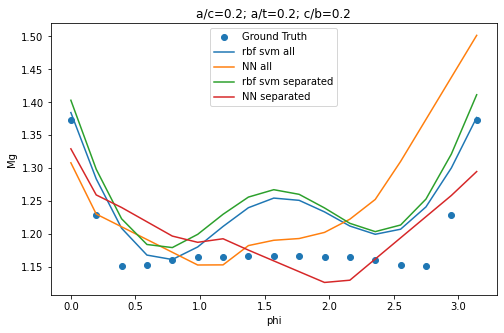

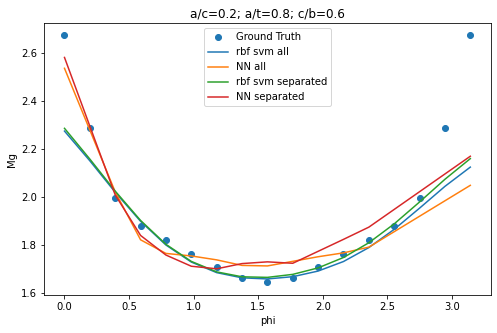

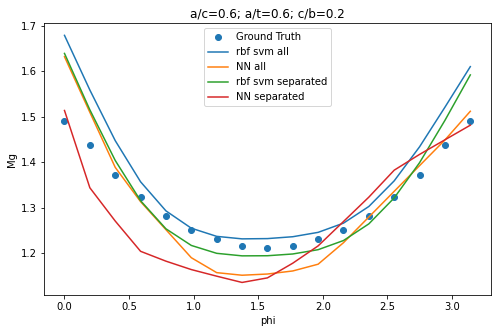

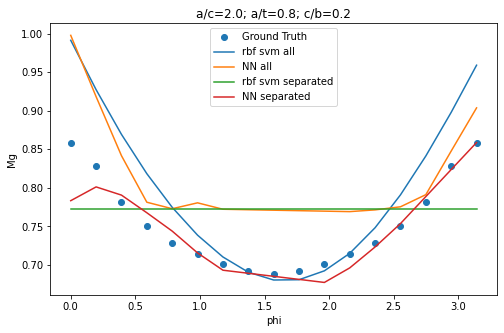

In [5]:
results_all, results_sep = compare(models, data_num)

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, 0)

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, int(len(models)/4))

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, int(len(models)/2))

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, int(len(models)-1))

# RN Eqn

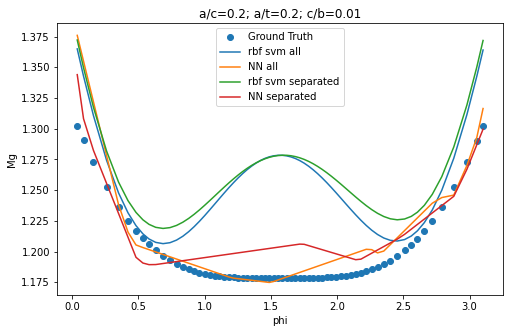

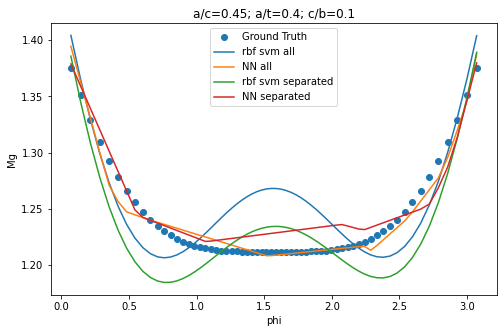

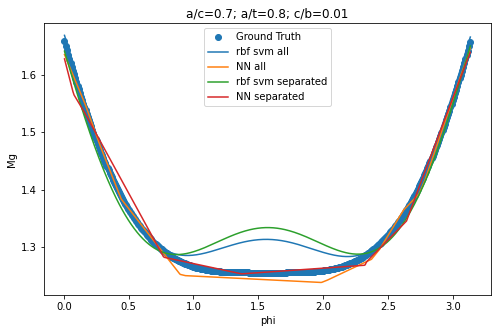

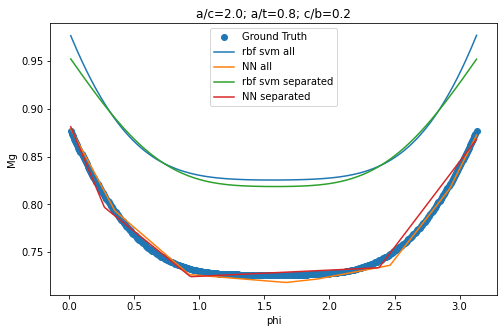

In [6]:
data_num = "2"
# Loading test dataset
df = pd.read_csv("../data/3_datasets_new/2_RN_eqn.csv")
d = df.to_numpy()

models = sort(d)

results_all, results_sep = compare(models, data_num)

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, 0)

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, int(len(models)/4))

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, int(len(models)/2))

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, int(len(models)-1))

# Full Franc3D

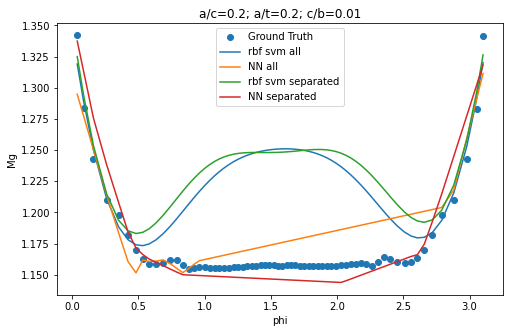

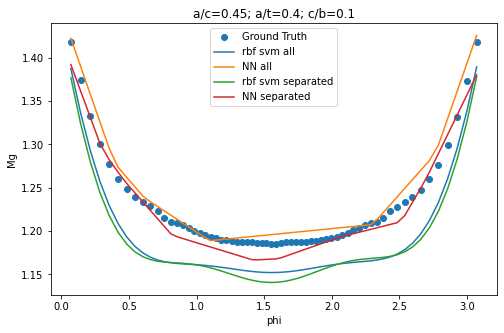

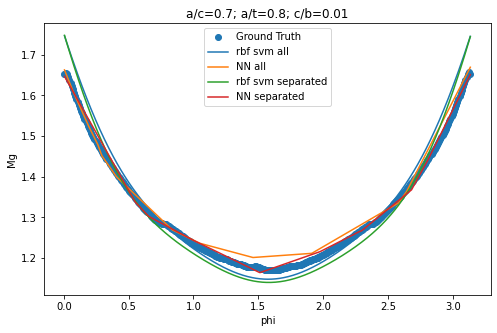

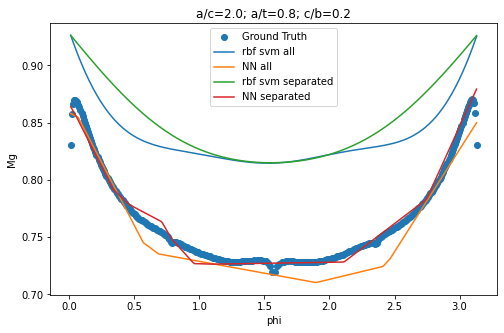

In [7]:
data_num = "3a"
# Loading test dataset
df = pd.read_csv("../data/3_datasets_new/3_FRANC3D_FULL.csv")
d = df.to_numpy()

models = sort(d)

results_all, results_sep = compare(models, data_num)

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, 0)

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, int(len(models)/4))

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, int(len(models)/2))

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, int(len(models)-1))

# Partial Franc3D

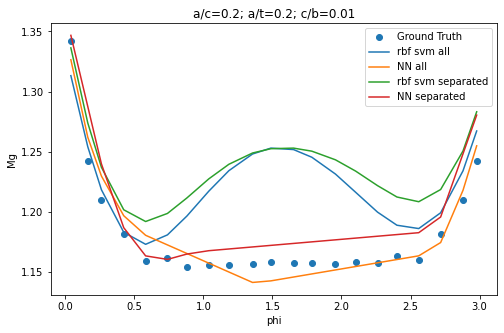

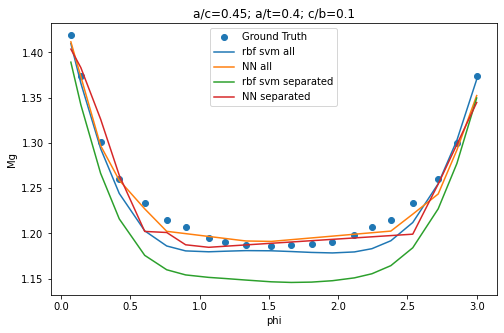

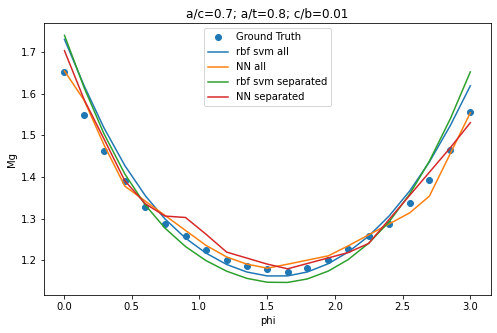

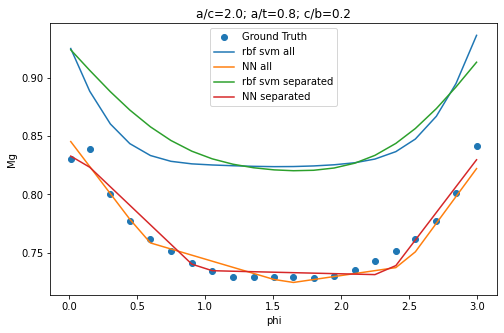

In [8]:
data_num = "3b"
# Loading test dataset
df = pd.read_csv("../data/3_datasets_new/3_FRANC3D_PHI_SAMPLE.csv")
d = df.to_numpy()

models = sort(d)

results_all, results_sep = compare(models, data_num)

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, 0)

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, int(len(models)/4))

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, int(len(models)/2))

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, int(len(models)-1))